In [89]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market") # 데이터셋 다운로드 경로

print("Path to dataset files:", path) # 데이터 셋 경로 출력

Path to dataset files: C:\Users\유대민\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


In [90]:
# 도미와 빙어 데이터를 합쳐 하나의 파이썬 리스트로 준비 - 생선의 길이와 무게를 위한 리스트를 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [91]:
# 두 파이썬 리스트를 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트를 만들것임
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
# 정답 데이터 생성 
fish_target = [1] * 35 + [0] * 14

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


하나의 생선 데이터를 샘플이라고 부름
도미와 빙어는 각각 35, 14마리가 있으므로
전체 데이터는 49개의 샘플이 있음
사용하는 특성 1. 길이, 2 무게
이 데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용


In [92]:
# KNeighborsClassifier 클래스 삽입
from sklearn.neighbors import KNeighborsClassifier
# 모델 객체 생성
kn = KNeighborsClassifier()


In [93]:
# 전체 데이터에서 처음 35개 생성
# 일반적으로 리스트처럼 배열의 요소를 선택할때는 배열의 위치, 즉 인덱스를 지정
# 배열 인덱스 0부터 시작
print(fish_data[4])

[29.0, 430.0]


파이썬 리스트는 슬라이싱(slicing) 이라는 특별한 연산자를 제공
:를 가운데에 두고 인덱스의 범위를 지정해 여러 개의 원소를 선택할 수 있음


In [94]:
# ex) 5개의 데이터 선택 0부터 시작하니까 5까지 해야함
print(fish_data[0:5])
# 인덱스 처음부터 시작하면 0(처음 인덱스) 생략 가능
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [95]:
# 마지막 원소까지 가는 슬라이싱은 마지막 원소의 인덱스 생략 가능
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [96]:
# 슬라이싱 연습!
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[0:34]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[0:34]
# 테스트 세트로 입력값 중 35번째 부터 마지막까지 사용
# 훈련 데이터와 테스트 데이터가 같으면 객관성이 덜어짐
# 연습시험본 데이터랑 실제 시험본 데이터가 같으면 객관성있냐??
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째 부터 마지막 인덱스 까지 사용
test_target = fish_target[35:]


In [97]:
# 각각 메서드에 맞게 데이터 넣기
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

정확도 0임ㅠㅠ 어떤것이 문제일까?
훈련 데이터랑 학습 데이터에 있는 샘플의 클래스 비율이 다름
제대로된 학습 모델을 만들지 못했음
샘플링 편향(sampling bias)이 일어남 
훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면
골구로 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야함

이런 작업을 간편하게 처리할 수 있도록 사용할 것이 넘파이(numpy)

넘파이(Numpy)는 파이썬의 대표적인 배열 라이브러리
2차원까지는 리스트로 표현 쉽지만
고차원 리스트를 표현하려면 매우 번거로움
넘파이는 고차원 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공


In [98]:
# 생선 데이터를 2차원 numpy로 변환해보자
import numpy as np # as를 써서 np로 간편하게 부르기
# 넘파이 array() 함수에 파이썬 리스트를 전달하면 끝
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 원래같으면 fish_data = [[l,w] for l,w in zip(length, weight)] 이렇게 zip() 메서드 사용해서 하나씩 꺼내서 집어넣어서 해야함

In [99]:
print(input_arr)
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [100]:
# 2차원 아니고 그냥 1차원
print(fish_data)
print(fish_target)

"""
fish_data_with_zip = [[l, w] for l, w in zip(fish_length, fish_weight)]
이거는 두개 fish_length, fish_weight 각각 배회하면서 같은 인덱스끼리 합쳐서 하나의 리스트 만든것
print(fish_data_with_zip)
"""

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'\nfish_data_with_zip = [[l, w] for l, w in zip(fish_length, fish_weight)]\n이거는 두개 fish_length, fish_weight 각각 배회하면서 같은 인덱스끼리 합쳐서 하나의 리스트 만든것\nprint(fish_data_with_zip)\n'

In [101]:
# 넘파이는 친절하게 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력
# 출력 결과에서 49개의 행과 2개의 열을 쉽게 확인 가능
# 눈으로 확인하는 것 외에 배열의 크기를 알려주는 shape 속성을 제공
print(input_arr.shape)

(49, 2)


In [102]:
# print(np.random.random(42)) 이렇게하면 실행할때마다 값 바뀜
np.random.seed(42) # random 값 고정
# arange() 메서드 사용해서 0부터 48까지 1씩 증가하는 인덱스 간단히 만들 수 있음
index = np.arange(49)
# 위에서 생성한 인덱스 랜덤하게 섞음
np.random.shuffle(index)



In [103]:
# 넘파이 arrange() 메서드에 정수 N을 전달하면 0부터 N-1까지 1씩 증가하는 배열을 만듬
# 넘파이 random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞음
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


넘파이(Numpy)는 슬라이싱 이외에 배열 인덱싱 기능 제공, 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있음

In [104]:
print(input_arr[[1,3]])
# print(input_arr[[1,3,4,5,6,7,8 ...]]) 여러개 가능

[[ 26.3 290. ]
 [ 29.  363. ]]


In [105]:
# 리스트 대신 넘파이 배열을 인덱스로 전달 하는 것도 가능!
# 아래처럼 훈련 데이터와 만듬
train_input = input_arr[index[:35]] # index는 셔플하게 섞은 인덱스가 들어있음
train_target = target_arr[index[:35]]

In [106]:
# 입력데이터의 데이터셋과 훈련 데이터의 데이터 셋이 동일한지 잘 섞였는지 확인
# 랜덤으로 셔플해서 만들어진 훈련셋의 첫번째 인덱스의 데이터 값이 기존의 원래 위치의 인덱스값의 데이터값과 같은지 확인
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [116]:
# 테스트 데이터도 위처럼 만들기
test_input = input_arr[index[35:]] # 랜덤으로 셔플한 index에서 소환
test_target = target_arr[index[35:]]

print(test_input)
print(test_target)


[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


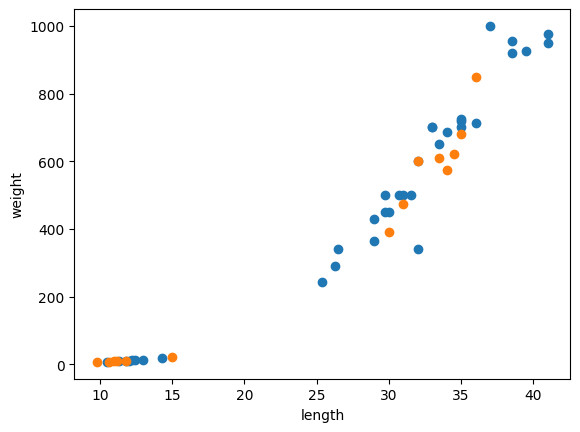

In [ ]:
import matplotlib.pyplot as plt #맷플롯립의 pyplot을 이용해 그림을 그릴 준비 as plt로 줄여서 간편하게
plt.scatter(train_input[:, 0], train_input[:,1]) # 슬라이싱 : 처음부터 마지막까지 전체면 암것도 안써도됨
 # 여기서 0, 1 은 첫번째 특성(길이 = 첫번째 열), 두번째 특성(무게 = 두번째 열)
plt.scatter(test_input[:, 0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 의도한대로 잘 섞임

In [118]:
# 훈련 세트와 테스트 세트로 KNN Nearest Neibors Algorithm 훈련 시키기
# fit() 메서드를 실행 할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버림
# 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야함
# 지금은 단순하게 이전에 만든 kn 객체를 그대로 사용
kn.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [119]:
# 인덱스를 섞어 만든 train_input, train_target으로 모델을 훈련시킴..
# 다음은 test_input, test_target으로 이 모델을 테스트
kn.score(test_input, test_target)

1.0

드디어 성공! 정확도 1은 100% 정확하다는 것
사이킷런은 기준
predict() 메서드로테스트 세트의 예측 결과와 실제 타깃을 확인

In [ ]:
kn.predict(test_input)
# predict() 메서드는 새로운 데이터의 정답을 예측
# predict()에 test_input의 데이터를 넣음

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [121]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])